


# Kaggle Challenge


* Files Description: 
    * train.csv - the training set, contains comments with their binary labels

* Data Description:
We have a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are:

    * toxic
    * severe_toxic
    * obscene
    * threat
    * insult
    * identity_hate


* Objective : Create a model which predicts a probability of each type of toxicity for each comment.
-----

In [1]:
# Import Modules
import pandas as pd
import os

In [2]:
train=pd.read_csv('/Users/maevapena-pitra/Documents/Machine_Learning /Kaggle_Toxic/train.csv',sep=',')

In [42]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:

texts = train["comment_text"].fillna("DUMMY_VALUE").values
possible_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
labels = train[possible_labels].values

In [4]:
texts.shape

(159571,)

In [5]:
labels.shape

(159571, 6)

# Parameters

In [6]:
max_length = 100
max_words = 20000
embedding_dim = 100

# Tokenize the data

In [7]:
# Import Modules
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [8]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 210337 unique tokens.


In [9]:
# From texts to sequences of integers 
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen= max_length)
labels = np.asarray(labels)

In [10]:
# Shuffle Data
indices = np.arange(len(data))
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
print('Shape of data tensor:', data.shape)

Shape of data tensor: (159571, 100)


In [11]:
# Split 
split = int(.8 * len(texts))
train_data = data[:split]
train_labels = labels[:split]

test_data = data[split:]
test_labels = labels[split:]

# Using Embedding Layer

In [13]:
# We Create a model with Embedding Layer
from keras import models, layers

In [14]:
model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(len(possible_labels), activation = "sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 60006     
Total params: 2,060,006
Trainable params: 2,060,006
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [16]:
history = model.fit(train_data, train_labels, epochs = 40, batch_size=128, validation_split=.2)

Train on 102124 samples, validate on 25532 samples
Epoch 1/40
102124/102124 [==============================] - 29s 288us/step - loss: 0.0873 - acc: 0.9726 - val_loss: 0.0751 - val_acc: 0.9759
Epoch 2/40
102124/102124 [==============================] - 29s 282us/step - loss: 0.0662 - acc: 0.9783 - val_loss: 0.0706 - val_acc: 0.9775
Epoch 3/40
102124/102124 [==============================] - 29s 281us/step - loss: 0.0610 - acc: 0.9797 - val_loss: 0.0714 - val_acc: 0.9776
Epoch 4/40
102124/102124 [==============================] - 29s 282us/step - loss: 0.0561 - acc: 0.9811 - val_loss: 0.0728 - val_acc: 0.9778
Epoch 5/40
102124/102124 [==============================] - 32s 309us/step - loss: 0.0505 - acc: 0.9829 - val_loss: 0.0755 - val_acc: 0.9767
Epoch 6/40
102124/102124 [==============================] - 31s 299us/step - loss: 0.0449 - acc: 0.9847 - val_loss: 0.0731 - val_acc: 0.9775
Epoch 7/40
102124/102124 [==============================] - 29s 282us/step - loss: 0.0394 - acc: 0.9865

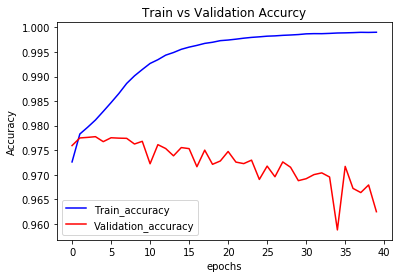

In [17]:
plt.plot(history.history["acc"], "b", label = "Train_accuracy")
plt.plot(history.history["val_acc"], "r", label = "Validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accurcy")
plt.legend()
plt.show()

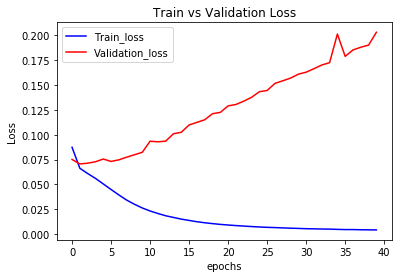

In [18]:
plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

In [19]:
model.evaluate(test_data, test_labels)

31915/31915 [==============================] - 1s 47us/step


[0.19874019904379353, 0.9629693340679966]

# Using Pre-trained Word Embedding

### Embedding_index : dictionary { word : vector}

In [20]:
dir_glove= '/Users/maevapena-pitra/Documents/Machine_Learning /Kaggle_Toxic'
embedding_index={}

f = open(os.path.join(dir_glove, "glove.6B.100d.txt"), encoding = "utf8")
for line in f:
    values = line.split()
    word = values[0]
    embedding_index[word] = np.asarray(values[1:], dtype = "float32")
f.close()

### Embedding_matrix of shape (max_words, embedding_dimension)

In [21]:
embedding_matrix = np.zeros((max_words,embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word) 
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

### load pre-trained word embeddings into an Embedding layer

In [22]:
num_words = min(max_words, len(word_index) + 1)

embedding_layer = layers.Embedding(
  num_words,
  embedding_dim,
  weights=[embedding_matrix],
  input_length=max_length,
  trainable=False
)

### Creating a Model with a pre-trained Embedding layer

In [23]:
model = models.Sequential()
model.add(embedding_layer)
model.add(layers.Flatten())
model.add(layers.Dense(len(possible_labels), activation = "sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 60006     
Total params: 2,060,006
Trainable params: 60,006
Non-trainable params: 2,000,000
_________________________________________________________________


In [24]:
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [25]:
history = model.fit(train_data, train_labels, epochs = 40, batch_size=128, validation_split=.2)

Train on 102124 samples, validate on 25532 samples
Epoch 1/40
102124/102124 [==============================] - 9s 84us/step - loss: 0.1002 - acc: 0.9696 - val_loss: 0.0956 - val_acc: 0.9690
Epoch 2/40
102124/102124 [==============================] - 8s 79us/step - loss: 0.0793 - acc: 0.9741 - val_loss: 0.0895 - val_acc: 0.9720
Epoch 3/40
102124/102124 [==============================] - 8s 80us/step - loss: 0.0718 - acc: 0.9761 - val_loss: 0.0906 - val_acc: 0.9725
Epoch 4/40
102124/102124 [==============================] - 8s 77us/step - loss: 0.0670 - acc: 0.9773 - val_loss: 0.0924 - val_acc: 0.9726
Epoch 5/40
102124/102124 [==============================] - 8s 77us/step - loss: 0.0634 - acc: 0.9783 - val_loss: 0.0942 - val_acc: 0.9704
Epoch 6/40
102124/102124 [==============================] - 8s 78us/step - loss: 0.0609 - acc: 0.9790 - val_loss: 0.0972 - val_acc: 0.9698
Epoch 7/40
102124/102124 [==============================] - 8s 78us/step - loss: 0.0588 - acc: 0.9797 - val_loss: 0

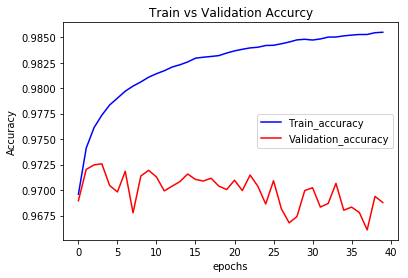

In [26]:
plt.plot(history.history["acc"], "b", label = "Train_accuracy")
plt.plot(history.history["val_acc"], "r", label = "Validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accurcy")
plt.legend()
plt.show()

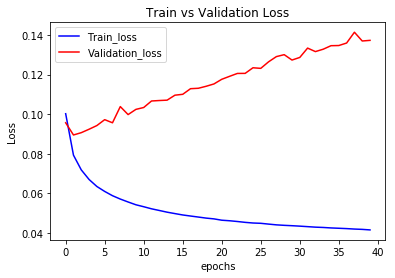

In [27]:
plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

In [28]:
model.evaluate(test_data, test_labels)

31915/31915 [==============================] - 1s 42us/step


[0.13636468038091384, 0.9693613143507336]

# Using Recurrent Neural Network 

### Simple RNN with numpy  

In [29]:
# Basic Recurrent Layer
T = 100
D = 10
V = 15



inputs = np.random.random((T,D))
W = np.random.random((V, D))
U = np.random.random((V, V))
b = np.random.random((V,))
    
s_t = np.zeros((V,))
outputs = []
for input in inputs:
    output = np.tanh(np.dot(W, input) + np.dot(U, s_t) + b) 
    outputs.append(output)
    s_t = output

outputs = np.asarray(outputs)

In [30]:
inputs.shape

(100, 10)

In [31]:
output.shape

(15,)

### SimpleRNN on dataset

In [32]:
model = models.Sequential()
model.add(embedding_layer)
model.add(layers.SimpleRNN(embedding_dim))
model.add(layers.Dense(len(possible_labels), activation = "sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 606       
Total params: 2,020,706
Trainable params: 20,706
Non-trainable params: 2,000,000
_________________________________________________________________


In [33]:
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [34]:
history = model.fit(train_data, train_labels, epochs = 40, batch_size=128, validation_split=.2)

Train on 102124 samples, validate on 25532 samples
Epoch 1/40
102124/102124 [==============================] - 71s 692us/step - loss: 0.0964 - acc: 0.9685 - val_loss: 0.0807 - val_acc: 0.9742
Epoch 2/40
102124/102124 [==============================] - 70s 685us/step - loss: 0.0799 - acc: 0.9731 - val_loss: 0.0803 - val_acc: 0.9733
Epoch 3/40
102124/102124 [==============================] - 71s 697us/step - loss: 0.0754 - acc: 0.9740 - val_loss: 0.0850 - val_acc: 0.9666
Epoch 4/40
102124/102124 [==============================] - 72s 703us/step - loss: 0.0730 - acc: 0.9750 - val_loss: 0.0706 - val_acc: 0.9762
Epoch 5/40
102124/102124 [==============================] - 72s 701us/step - loss: 0.0770 - acc: 0.9734 - val_loss: 0.0780 - val_acc: 0.9739
Epoch 6/40
102124/102124 [==============================] - 72s 706us/step - loss: 0.0750 - acc: 0.9738 - val_loss: 0.0734 - val_acc: 0.9751
Epoch 7/40
102124/102124 [==============================] - 72s 707us/step - loss: 0.0730 - acc: 0.9745

In [35]:
# Evaluate the model 
model.evaluate(test_data, test_labels)

31915/31915 [==============================] - 16s 511us/step


[0.06261609678645315, 0.9788761711449304]

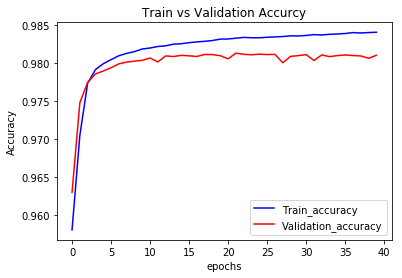

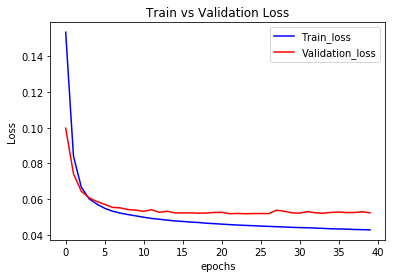

In [40]:
# Plots 
plt.plot(history.history["acc"], "b", label = "Train_accuracy")
plt.plot(history.history["val_acc"], "r", label = "Validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accurcy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

### LSTM with Global MaxPool 

In [38]:
# Create the Model
output_dim = 15
model = models.Sequential()
model.add(embedding_layer)
model.add(layers.LSTM(output_dim, return_sequences = True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(len(possible_labels), activation = "sigmoid"))
model.summary()

model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

history = model.fit(train_data, train_labels, epochs = 40, batch_size=128, validation_split=.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 15)           6960      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 15)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 96        
Total params: 2,007,056
Trainable params: 7,056
Non-trainable params: 2,000,000
_________________________________________________________________
Train on 102124 samples, validate on 25532 samples
Epoch 1/40
102124/102124 [==============================] - 120s 1ms/step - loss: 0.1535 - acc: 0.9581 - val_loss: 0.0997 - val_acc: 0.9630
Epoch 2/40
102124/102124 [==============================] - 119s 1ms/

In [39]:
# Evaluate the model 
model.evaluate(test_data, test_labels)

31915/31915 [==============================] - 28s 863us/step


[0.05003626134807453, 0.9821087133355897]

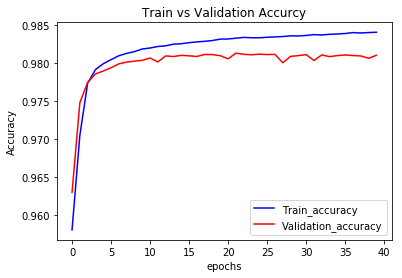

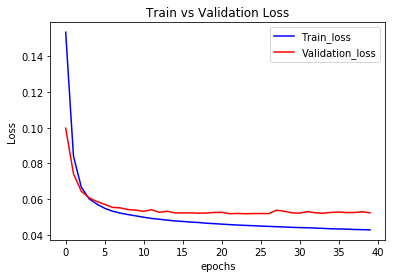

In [41]:
# Plots 
plt.plot(history.history["acc"], "b", label = "Train_accuracy")
plt.plot(history.history["val_acc"], "r", label = "Validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accurcy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

### Bidirectional LSTM with GlobalMaxPool

In [101]:
output_dim = 15
model = models.Sequential()
model.add(embedding_layer)
model.add(layers.Bidirectional(layers.LSTM(output_dim, return_sequences = True)))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(len(possible_labels), activation = "sigmoid"))
model.summary()

model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

history = model.fit(train_data, train_labels, epochs = 5, batch_size=128, validation_split=.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 30)           13920     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 30)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 186       
Total params: 2,014,106
Trainable params: 2,014,106
Non-trainable params: 0
_________________________________________________________________
Train on 102124 samples, validate on 25532 samples
Epoch 1/5
102124/102124 [==============================] - 229s 2ms/step - loss: 0.1553 - acc: 0.9604 - val_loss: 0.1396 - val_acc: 0.9639
Epoch 2/5
102124/102124 [==============================] - 216s 2ms/step -

In [102]:
# Evaluate the model 
model.evaluate(test_data, test_labels)

31915/31915 [==============================] - 24s 758us/step


[0.14259029198464193, 0.963763116307343]

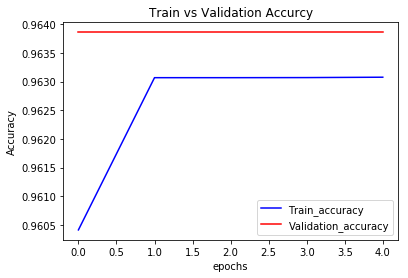

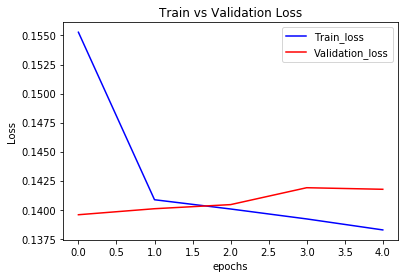

In [103]:
# Plots 
plt.plot(history.history["acc"], "b", label = "Train_accuracy")
plt.plot(history.history["val_acc"], "r", label = "Validation_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accurcy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()